In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Diabetes = pd.read_csv('https://raw.githubusercontent.com/MaskiVal/DataSets/main/diabetes.csv')

In [ ]:
Diabetes.shape

(768, 9)

In [ ]:
print(f"{Diabetes.Outcome.value_counts(normalize=True)*100}")
print(Diabetes.Outcome.value_counts())

0    65.104167
1    34.895833
Name: Outcome, dtype: float64
0    500
1    268
Name: Outcome, dtype: int64


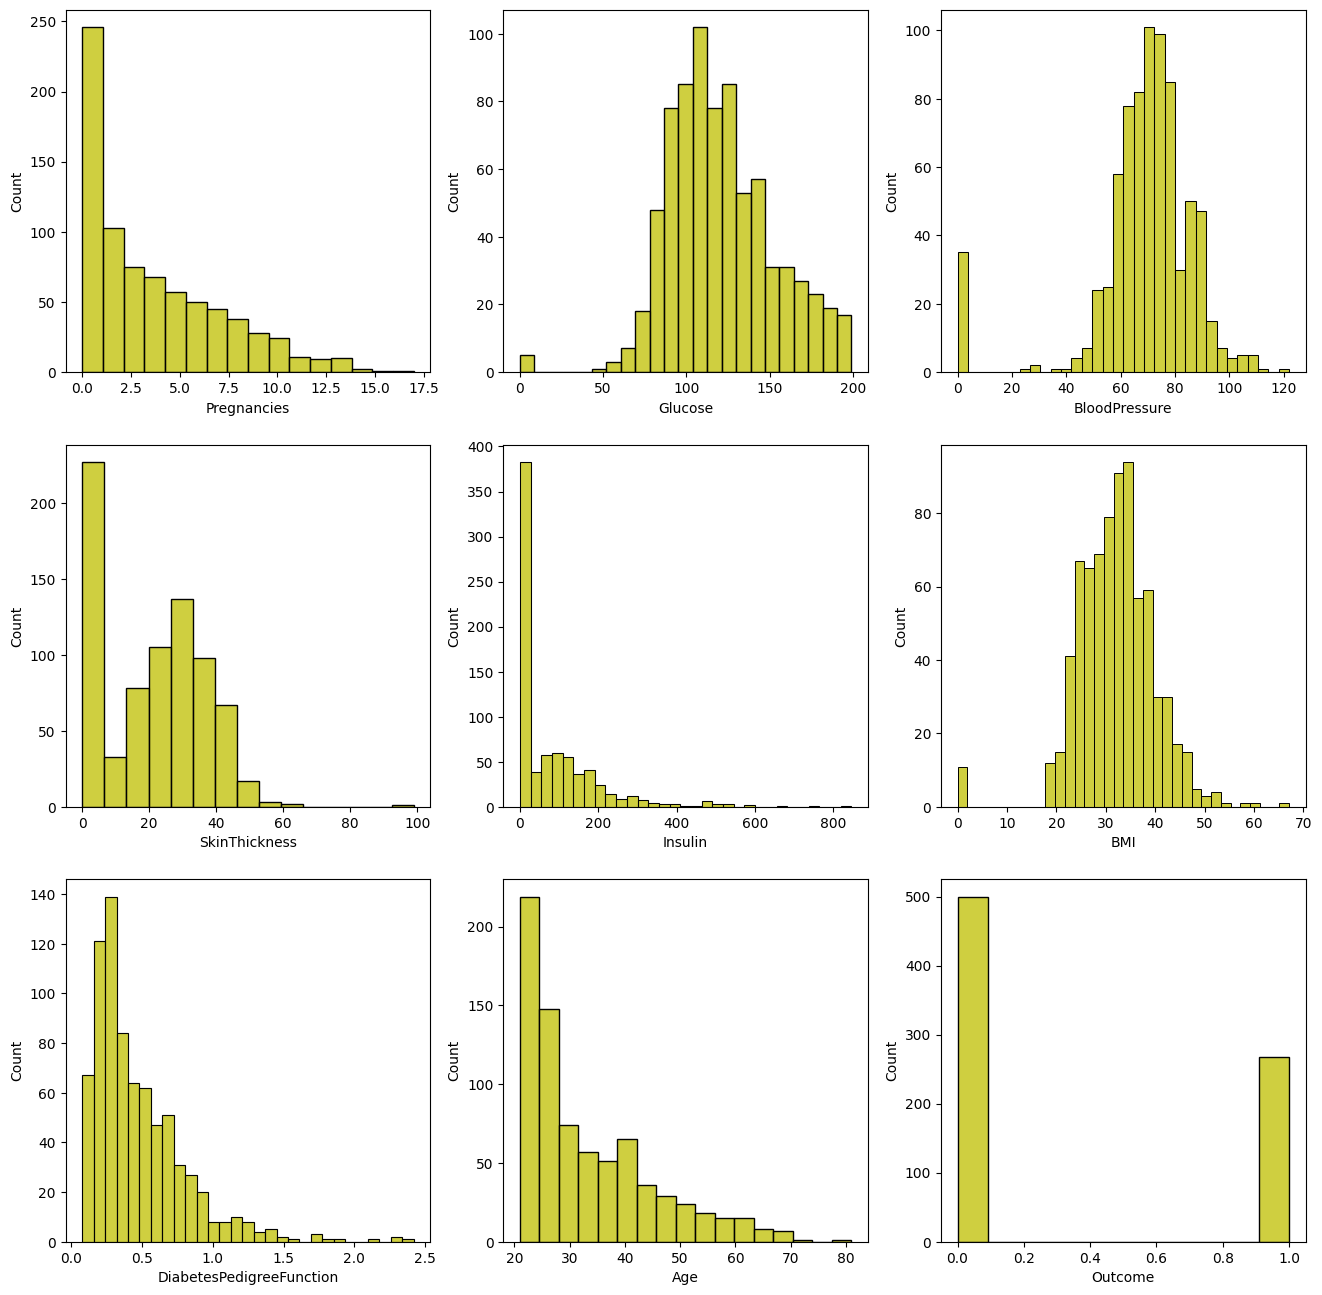

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(16,16))
for i, ax, column in zip(range(10), axes.flat, Diabetes.columns):
    sns.histplot(Diabetes,x=column,ax=ax,color='y')
plt.show()

In [ ]:
Diabetes.loc[Diabetes.duplicated() == True]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
Diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Après décision du client nous pouvons supprimer la colonne skin thickness qui n'est pas corrélée avec le diagnostic de la maladie

In [ ]:
Diabetes = Diabetes.drop(columns='SkinThickness')

Il nous reste ces colonnes dont les 0 sont a traiter 'Glucose', 'BloodPressure', 'Insulin', 'BMI'

In [ ]:
Diabetes[['Glucose', 'BloodPressure', 'Insulin', 'BMI']].skew()

Glucose          0.173754
BloodPressure   -1.843608
Insulin          2.272251
BMI             -0.428982
dtype: float64

Skewness values within the range of -1 and -0.5 (negative skewed) or 0.5 and 1(positive skewed) indicate slightly skewed data distributions. Data with skewness values less than -1 (negative skewed) or greater than 1 (positive skewed) are considered highly skewed.


In [ ]:
df = Diabetes.copy()

In [ ]:
df[['Glucose', 'BloodPressure', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'Insulin', 'BMI']].replace(0,np.nan)

In [ ]:
df[['Glucose', 'BloodPressure', 'Insulin', 'BMI']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        763 non-null    float64
 1   BloodPressure  733 non-null    float64
 2   Insulin        394 non-null    float64
 3   BMI            757 non-null    float64
dtypes: float64(4)
memory usage: 24.1 KB


In [ ]:
for column in ['Glucose', 'BloodPressure', 'Insulin', 'BMI']:
    if -0.5 <= df[column].skew() <= 0.5:
        print(df[df["Outcome"] == 1][column].mean())
        print(df[df["Outcome"] == 0][column].mean())
    else:
        print(df[df["Outcome"] == 1][column].median())
        print(df[df["Outcome"] == 0][column].median())

140.0
107.0
75.32142857142857
70.87733887733887
169.5
102.5
34.3
30.1


In [ ]:
for i, column in enumerate(['Glucose', 'BloodPressure', 'Insulin', 'BMI']):
    if i % 2 == 0:
        if -0.5 <= df[column].skew() <= 0.5:
            mask = (df["Outcome"] == 0) & (df[column] == 0)
            non_zero_values = df.loc[(df["Outcome"] == 0) & (df[column] != 0), column]

            if not non_zero_values.empty:
                replacement_value = non_zero_values.mean()
                df.loc[mask, column] = df.loc[mask, column].replace(0, replacement_value)
        else:
            mask = (df["Outcome"] == 0) & (df[column] == 0)
            non_zero_values = df.loc[(df["Outcome"] == 0) & (df[column] != 0), column]

            if not non_zero_values.empty:
                replacement_value = non_zero_values.median()
                df.loc[mask, column] = df.loc[mask, column].replace(0, replacement_value)
    else:
        if -0.5 <= df[column].skew() <= 0.5:
            mask = (df["Outcome"] == 1) & (df[column] == 0)
            non_zero_values = df.loc[(df["Outcome"] == 1) & (df[column] != 0), column]

            if not non_zero_values.empty:
                replacement_value = non_zero_values.mean()
                df.loc[mask, column] = df.loc[mask, column].replace(0, replacement_value)
        else:
            mask = (df["Outcome"] == 1) & (df[column] == 0)
            non_zero_values = df.loc[(df["Outcome"] == 1) & (df[column] != 0), column]

            if not non_zero_values.empty:
                replacement_value = non_zero_values.median()
                df.loc[mask, column] = df.loc[mask, column].replace(0, replacement_value)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,23.3,0.672,32,1
3,1,89.0,66.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,30.1,0.349,47,1


In [ ]:
df.iloc[75]

Pregnancies                  1.00
Glucose                       NaN
BloodPressure               48.00
Insulin                       NaN
BMI                         24.70
DiabetesPedigreeFunction     0.14
Age                         22.00
Outcome                      0.00
Name: 75, dtype: float64

In [ ]:
Diabetes.loc[Diabetes['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,0,24.7,0.140,22,0
182,1,0,74,23,27.7,0.299,21,0
342,1,0,68,0,32.0,0.389,22,0
349,5,0,80,0,41.0,0.346,37,1
502,6,0,68,0,39.0,0.727,41,1


In [ ]:
list_m = [(140.0,
107.0),
(75.32142857142857,
70.87733887733887),
(169.5,
102.5),
(34.3,
30.1)]

In [ ]:
from scipy import stats

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(16,16))
for i, ax, column in zip(range(10), axes.flat, Diabetes.columns):
    sns.boxplot(x="Outcome", y=column, data=df,ax=ax)
    sns.stripplot(x="Outcome", y=column, data=df, color="black", jitter=0.2, size=2)

    Perform t-test
    outcome_0 = df[df["Outcome"] == 0][column]
    outcome_1 = df[df["Outcome"] == 1][column]
    t_stat, p_value = stats.ttest_ind(outcome_0, outcome_1)

# Add annotations
    if p_value < 0.05:
        ax.text(0.5, max(df[column]), f"P-Value: {p_value:.4f}\nSignificant", ha='center', va='center', color='red')
    else:
        ax.text(0.5, max(df[column]), f"P-Value: {p_value:.4f}\nNot Significant", ha='center', va='center', color='black')


# Show the plot
plt.show()

SyntaxError: invalid syntax (<ipython-input-20-bb596488f9f2>, line 6)

In [ ]:
df.info()